In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
## Lets Create synthetic datapoints
from sklearn.datasets import make_classification

X,Y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [17]:
X

array([[ 0.3196591 ,  0.70126137],
       [ 0.72650359, -1.81816835],
       [ 0.47541632,  0.42350647],
       ...,
       [-2.94779143,  2.41206522],
       [-1.66592543,  0.36001554],
       [ 0.92067531, -1.31713845]], shape=(1000, 2))

In [18]:
Y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,

<Axes: xlabel='0', ylabel='1'>

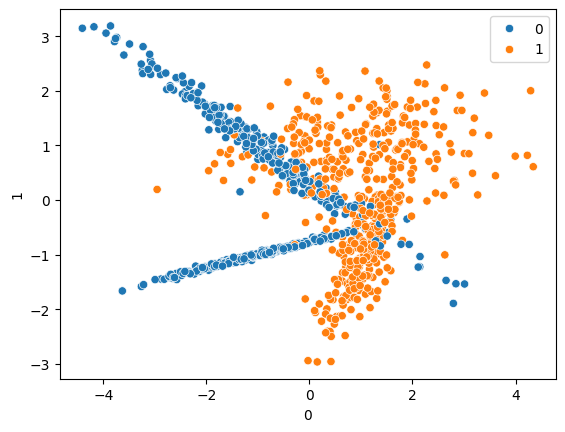

In [19]:
df = pd.DataFrame(X)
sns.scatterplot(x=df[0], y=df[1], hue=Y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [21]:
from sklearn.svm import SVC
scv = SVC(kernel='linear')

In [22]:
scv.fit(X_train,Y_train)

SVC(kernel='linear')

In [23]:
Y_pred = scv.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       123
           1       0.84      0.90      0.87       127

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

[[101  22]
 [ 13 114]]


In [25]:
## as the datapoints are overlapping from the two classes we will use svc kernels to increase the accuracy.

In [26]:
rbf = SVC(kernel='rbf')

In [27]:
rbf.fit(X_train,Y_train)

SVC()

In [28]:
Y_pred_rbf = rbf.predict(X_test)

In [29]:
print(classification_report(Y_test,Y_pred_rbf))
cm = confusion_matrix(Y_test,Y_pred_rbf)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       123
           1       0.92      0.89      0.90       127

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[113  10]
 [ 14 113]]


In [30]:
poly = SVC(kernel='poly')
poly.fit(X_train,Y_train)
Y_pred_poly = poly.predict(X_test)
print(classification_report(Y_test,Y_pred_poly))
cm = confusion_matrix(Y_test,Y_pred_poly)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       123
           1       0.82      0.91      0.86       127

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[ 97  26]
 [ 12 115]]


In [31]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,Y_train)
Y_pred_sigmoid = sigmoid.predict(X_test)
print(classification_report(Y_test,Y_pred_sigmoid))
cm = confusion_matrix(Y_test,Y_pred_sigmoid)
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       123
           1       0.80      0.84      0.82       127

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250

[[ 97  26]
 [ 20 107]]


## Hyperparameter tuning using GridSearchCV 

In [32]:
from sklearn.model_selection import GridSearchCV

## defining parameter range for hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3,cv=5)

In [33]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.793 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [34]:
Y_pred_grid = grid.predict(X_test)

In [35]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [36]:
print(classification_report(Y_test,Y_pred_grid))
print(confusion_matrix(Y_test,Y_pred_grid))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       123
           1       0.95      0.91      0.93       127

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[117   6]
 [ 11 116]]
